In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
all_data = pd.read_csv('./train.csv')
all_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

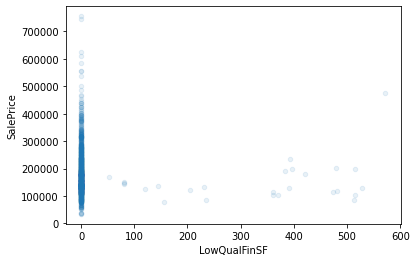

In [5]:
all_data.plot(kind="scatter", x="LowQualFinSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

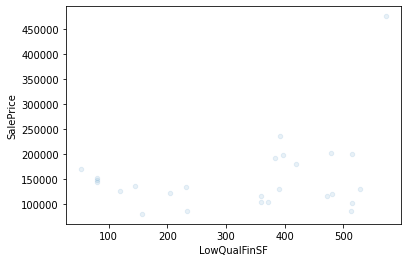

In [6]:
all_data.query("LowQualFinSF != 0").plot(kind="scatter", x="LowQualFinSF", y="SalePrice", alpha=0.1)

In [7]:
len(all_data.query("LowQualFinSF != 0"))

26

In [10]:
pd.set_option("display.max_rows", None)
data_types = pd.DataFrame(columns=["name", "size", "nonzero_size", "dtype", "variation", "types"])
columns = all_data.columns.drop(["Id", "SalePrice"])

for idx in columns:
  column = all_data[idx].dropna()
  size = len(column)
  nonzero_size = len(column[column != 0])
  dtype = column.dtype
  types = sorted(column.unique())
  row = { "name": idx, "size": size, "nonzero_size": nonzero_size, "dtype": dtype, "variation": len(types), "types": types }
  data_types = data_types.append(row, ignore_index=True)

data_types

name  size nonzero_size    dtype variation  \
0      MSSubClass  1460         1460    int64        15   
1        MSZoning  1460         1460   object         5   
2     LotFrontage  1201         1201  float64       110   
3         LotArea  1460         1460    int64      1073   
4          Street  1460         1460   object         2   
5           Alley    91           91   object         2   
6        LotShape  1460         1460   object         4   
7     LandContour  1460         1460   object         4   
8       Utilities  1460         1460   object         2   
9       LotConfig  1460         1460   object         5   
10      LandSlope  1460         1460   object         3   
11   Neighborhood  1460         1460   object        25   
12     Condition1  1460         1460   object         9   
13     Condition2  1460         1460   object         8   
14       BldgType  1460         1460   object         5   
15     HouseStyle  1460         1460   object         8   
16    OverallQual  1460         1460    int64        10   
17    OverallCond  1460         1460    int64         9   
18      YearBuilt  1460         1460    int64       112   
19   YearRemodAdd  1460         1460    int64        61   
20      RoofStyle  1460         1460   object         6   
21       RoofMatl  1460         1460   object         8   
22    Exterior1st  1460         1460   object        15   
23    Exterior2nd  1460         1460   object        16   
24     MasVnrType  1452         1452   object         4   
25     MasVnrArea  1452          591  float64       327   
26      ExterQual  1460         1460   object         4   
27      ExterCond  1460         1460   object         5   
28     Foundation  1460         1460   object         6   
29       BsmtQual  1423         1423   object         4   
30       BsmtCond  1423         1423   object         4   
31   BsmtExposure  1422         1422   object         4   
32   BsmtFinType1  1423         1423   object         6   
33     BsmtFinSF1  1460          993    int64       637   
34   BsmtFinType2  1422         1422   object         6   
35     BsmtFinSF2  1460          167    int64       144   
36      BsmtUnfSF  1460         1342    int64       780   
37    TotalBsmtSF  1460         1423    int64       721   
38        Heating  1460         1460   object         6   
39      HeatingQC  1460         1460   object         5   
40     CentralAir  1460         1460   object         2   
41     Electrical  1459         1459   object         5   
42       1stFlrSF  1460         1460    int64       753   
43       2ndFlrSF  1460          631    int64       417   
44   LowQualFinSF  1460           26    int64        24   
45      GrLivArea  1460         1460    int64       861   
46   BsmtFullBath  1460          604    int64         4   
47   BsmtHalfBath  1460           82    int64         3   
48       FullBath  1460         1451    int64         4   
49       HalfBath  1460          547    int64         3   
50   BedroomAbvGr  1460         1454    int64         8   
51   KitchenAbvGr  1460         1459    int64         4   
52    KitchenQual  1460         1460   object         4   
53   TotRmsAbvGrd  1460         1460    int64        12   
54     Functional  1460         1460   object         7   
55     Fireplaces  1460          770    int64         4   
56    FireplaceQu   770          770   object         5   
57     GarageType  1379         1379   object         6   
58    GarageYrBlt  1379         1379  float64        97   
59   GarageFinish  1379         1379   object         3   
60     GarageCars  1460         1379    int64         5   
61     GarageArea  1460         1379    int64       441   
62     GarageQual  1379         1379   object         5   
63     GarageCond  1379         1379   object         5   
64     PavedDrive  1460         1460   object         3   
65     WoodDeckSF  1460          699    int64       274   
66    OpenPorchSF  1460          804    int64       202   
6

In [9]:
data_types.to_csv("./data-types-02.csv", index=False)

<AxesSubplot:>

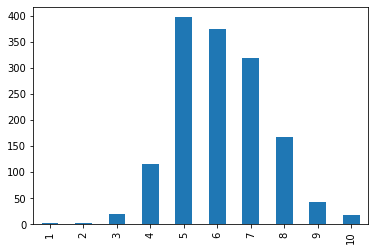

In [14]:
all_data["OverallQual"].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

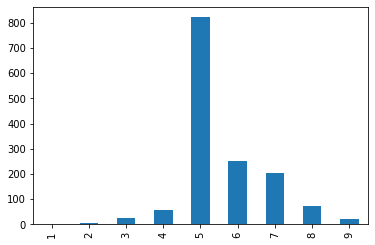

In [15]:
all_data["OverallCond"].value_counts().sort_index().plot(kind='bar')

MoSold + YrSoldした方が良い？季節変動だけで見れる？

<AxesSubplot:>

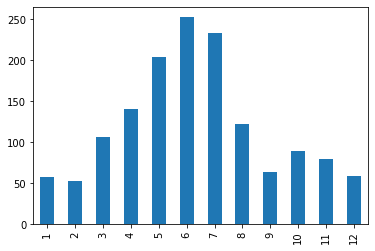

In [16]:
all_data["MoSold"].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

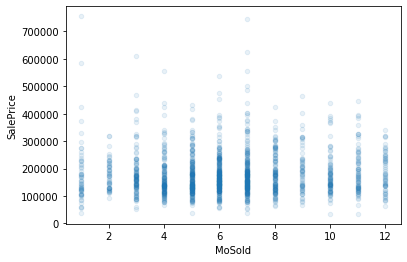

In [18]:
all_data.plot(kind="scatter", x="MoSold", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

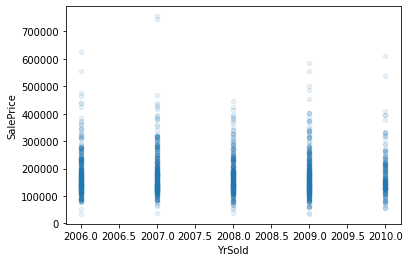

In [19]:
all_data.plot(kind="scatter", x="YrSold", y="SalePrice", alpha=0.1)

In [32]:
pd.reset_option("display.max_rows")

ym = all_data["YrSold"].astype(str) + "/" + all_data["MoSold"].astype(str)
ym_prices = all_data[["SalePrice"]].assign(ym=ym).sort_values("ym")
ym_prices

SalePrice      ym
411      145000  2006/1
810      181000  2006/1
1040     155000  2006/1
169      228000  2006/1
141      260000  2006/1
...         ...     ...
419      142000  2010/7
66       180000  2010/7
1144      80000  2010/7
1421     127500  2010/7
1160     146000  2010/7

[1460 rows x 2 columns]

<AxesSubplot:xlabel='ym', ylabel='SalePrice'>

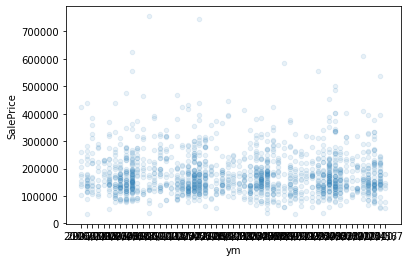

In [33]:
ym_prices.plot(kind="scatter", x="ym", y="SalePrice", alpha=0.1)

傾向は出なそう。頻度の濃淡はあるが販売価格の上下はあまり見えない

SaleCondition, SaleType

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

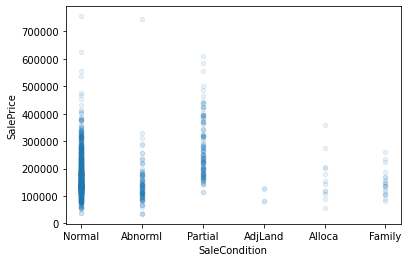

In [34]:
all_data.plot(kind="scatter", x="SaleCondition", y="SalePrice", alpha=0.1)

<AxesSubplot:>

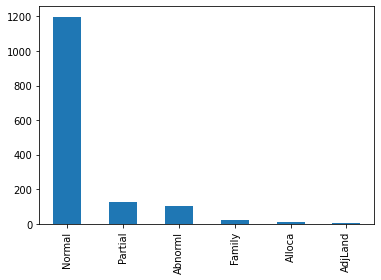

In [35]:
all_data["SaleCondition"].value_counts().plot(kind="bar")

Abnormal, Familyは低く、Partialは高くなりがちという傾向はあるか。

ただ Normal, Patrial, Abnormal以外は件数少ないので「傾向」と言えるのか。

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

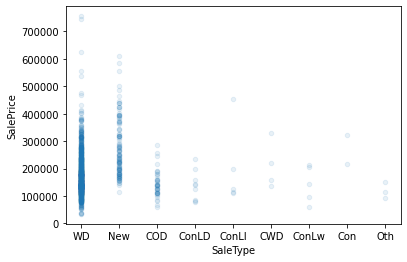

In [36]:
all_data.plot(kind="scatter", x="SaleType", y="SalePrice", alpha=0.1)

<AxesSubplot:>

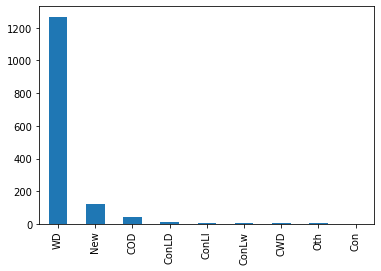

In [37]:
all_data["SaleType"].value_counts().plot(kind="bar")

In [63]:
corr = all_data.drop("Id", axis=1).corr()
sale_corr = corr[["SalePrice"]]
sale_corr

SalePrice
MSSubClass     -0.084284
LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000

In [43]:
sale_corr.to_csv("./corr-02.csv", index_label="Name")

In [52]:
pd.reset_option("display.max_rows")

data_types = pd.DataFrame(columns=["size", "nonzero_size", "dtype", "variation", "types"])
columns = all_data.columns.drop(["Id", "SalePrice"])

for idx in columns:
  column = all_data[idx].dropna()
  size = len(column)
  nonzero_size = len(column[column != 0])
  dtype = column.dtype
  types = sorted(column.unique())
  row = pd.Series({ "size": size, "nonzero_size": nonzero_size, "dtype": dtype, "variation": len(types), "types": types }, name=idx)
  data_types = data_types.append(row)

data_types.insert(3, 'corr', sale_corr)
data_types

size nonzero_size    dtype      corr variation  \
MSSubClass     1460         1460    int64 -0.084284        15   
MSZoning       1460         1460   object       NaN         5   
LotFrontage    1201         1201  float64  0.351799       110   
LotArea        1460         1460    int64  0.263843      1073   
Street         1460         1460   object       NaN         2   
...             ...          ...      ...       ...       ...   
MiscVal        1460           52    int64 -0.021190        21   
MoSold         1460         1460    int64  0.046432        12   
YrSold         1460         1460    int64 -0.028923         5   
SaleType       1460         1460   object       NaN         9   
SaleCondition  1460         1460   object       NaN         6   

                                                           types  
MSSubClass     [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 1...  
MSZoning                               [C (all), FV, RH, RL, RM]  
LotFrontage    [21.0, 24.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36....  
LotArea        [1300, 1477, 1491, 1526, 1533, 1596, 1680, 186...  
Street                                              [Grvl, Pave]  
...                                                          ...  
MiscVal        [0, 54, 350, 400, 450, 480, 500, 560, 600, 620...  
MoSold                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
YrSold                            [2006, 2007, 2008, 2009, 2010]  
SaleType       [COD, CWD, Con, ConLD, ConLI, ConLw, New, Oth,...  
SaleCondition  [Abnorml, AdjLand, Alloca, Family, Normal, Par...  

[79 rows x 6 columns]

In [54]:
data_types.to_csv("./data-types-02-2.csv", index_label = ["Name"])

In [57]:
cols = ["MasVnrArea", "BsmtFinSF1", "2ndFlrSF", "WoodDeckSF", "OpenPorchSF"]
all_data_replace_0 = all_data.copy()
all_data_replace_0[cols] = all_data_replace_0[cols].replace({ 0: np.nan })
all_data_replace_0

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [67]:
corr = all_data_replace_0.drop("Id", axis=1).corr()
sale_corr_2 = corr[["SalePrice"]]
sale_corr.assign(corr2=sale_corr_2, diff=(sale_corr - sale_corr_2))

SalePrice     corr2      diff
MSSubClass     -0.084284 -0.084284  0.000000
LotFrontage     0.351799  0.351799  0.000000
LotArea         0.263843  0.263843  0.000000
OverallQual     0.790982  0.790982  0.000000
OverallCond    -0.077856 -0.077856  0.000000
YearBuilt       0.522897  0.522897  0.000000
YearRemodAdd    0.507101  0.507101  0.000000
MasVnrArea      0.477493  0.434090  0.043403
BsmtFinSF1      0.386420  0.471690 -0.085271
BsmtFinSF2     -0.011378 -0.011378  0.000000
BsmtUnfSF       0.214479  0.214479  0.000000
TotalBsmtSF     0.613581  0.613581  0.000000
1stFlrSF        0.605852  0.605852  0.000000
2ndFlrSF        0.319334  0.673305 -0.353971
LowQualFinSF   -0.025606 -0.025606  0.000000
GrLivArea       0.708624  0.708624  0.000000
BsmtFullBath    0.227122  0.227122  0.000000
BsmtHalfBath   -0.016844 -0.016844  0.000000
FullBath        0.560664  0.560664  0.000000
HalfBath        0.284108  0.284108  0.000000
BedroomAbvGr    0.168213  0.168213  0.000000
KitchenAbvGr   -0.135907 -0.135907  0.000000
TotRmsAbvGrd    0.533723  0.533723  0.000000
Fireplaces      0.466929  0.466929  0.000000
GarageYrBlt     0.486362  0.486362  0.000000
GarageCars      0.640409  0.640409  0.000000
GarageArea      0.623431  0.623431  0.000000
WoodDeckSF      0.324413  0.193706  0.130707
OpenPorchSF     0.315856  0.086453  0.229403
EnclosedPorch  -0.128578 -0.128578  0.000000
3SsnPorch       0.044584  0.044584  0.000000
ScreenPorch     0.111447  0.111447  0.000000
PoolArea        0.092404  0.092404  0.000000
MiscVal        -0.021190 -0.021190  0.000000
MoSold          0.046432  0.046432  0.000000
YrSold         -0.028923 -0.028923  0.000000
SalePrice       1.000000  1.000000  0.000000

In [61]:
pd.reset_option("display.max_rows")

data_types = pd.DataFrame(columns=["size", "nonzero_size", "dtype", "variation", "types"])
columns = all_data.columns.drop(["Id", "SalePrice"])

for idx in columns:
  column = all_data[idx].dropna()
  size = len(column)
  nonzero_size = len(column[column != 0])
  dtype = column.dtype
  types = sorted(column.unique())
  row = pd.Series({ "size": size, "nonzero_size": nonzero_size, "dtype": dtype, "variation": len(types), "types": types }, name=idx)
  data_types = data_types.append(row)

data_types.insert(3, 'corr', sale_corr_2)
data_types

size nonzero_size    dtype      corr variation  \
MSSubClass     1460         1460    int64 -0.084284        15   
MSZoning       1460         1460   object       NaN         5   
LotFrontage    1201         1201  float64  0.351799       110   
LotArea        1460         1460    int64  0.263843      1073   
Street         1460         1460   object       NaN         2   
...             ...          ...      ...       ...       ...   
MiscVal        1460           52    int64 -0.021190        21   
MoSold         1460         1460    int64  0.046432        12   
YrSold         1460         1460    int64 -0.028923         5   
SaleType       1460         1460   object       NaN         9   
SaleCondition  1460         1460   object       NaN         6   

                                                           types  
MSSubClass     [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 1...  
MSZoning                               [C (all), FV, RH, RL, RM]  
LotFrontage    [21.0, 24.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36....  
LotArea        [1300, 1477, 1491, 1526, 1533, 1596, 1680, 186...  
Street                                              [Grvl, Pave]  
...                                                          ...  
MiscVal        [0, 54, 350, 400, 450, 480, 500, 560, 600, 620...  
MoSold                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
YrSold                            [2006, 2007, 2008, 2009, 2010]  
SaleType       [COD, CWD, Con, ConLD, ConLI, ConLw, New, Oth,...  
SaleCondition  [Abnorml, AdjLand, Alloca, Family, Normal, Par...  

[79 rows x 6 columns]

In [62]:
data_types.to_csv("./data-types-02-3.csv", index_label = ["Name"])

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

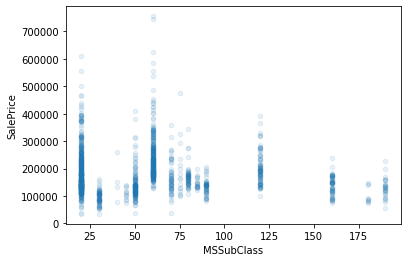

In [68]:
all_data.plot(kind="scatter", x="MSSubClass", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

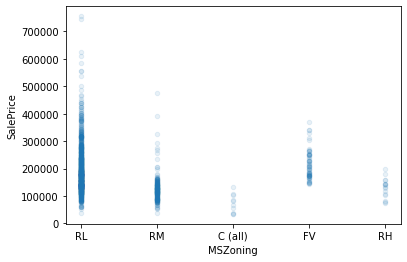

In [69]:
all_data.plot(kind="scatter", x="MSZoning", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

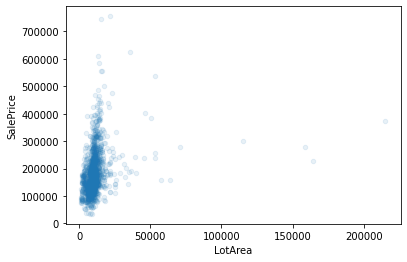

In [77]:
all_data.plot(kind="scatter", x="LotArea", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

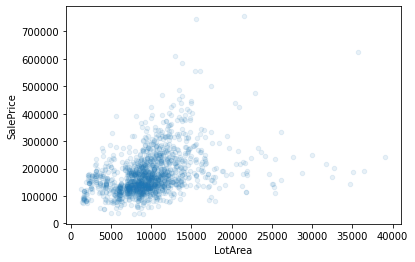

In [79]:
all_data.query("LotArea < 40000").plot(kind="scatter", x="LotArea", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

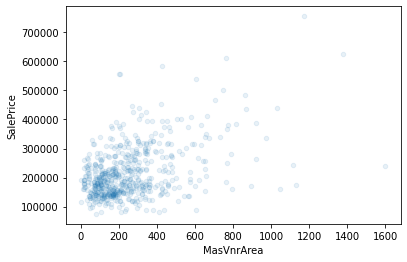

In [87]:
all_data.query("MasVnrArea != 0").plot(kind="scatter", x="MasVnrArea", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

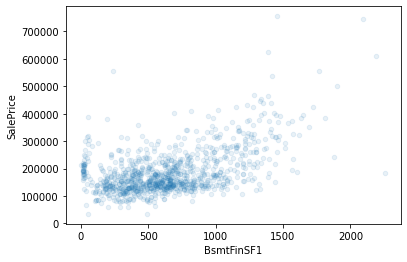

In [90]:
all_data.query("BsmtFinSF1 != 0 & BsmtFinSF1 < 5000").plot(kind="scatter", x="BsmtFinSF1", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

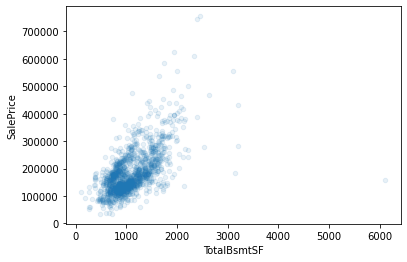

In [91]:
all_data.query("TotalBsmtSF != 0").plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

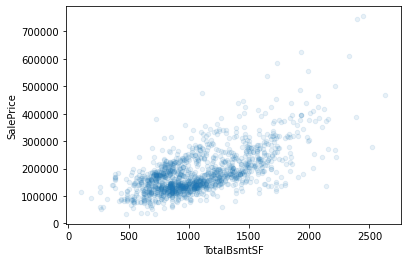

In [93]:
all_data.query("TotalBsmtSF != 0 & TotalBsmtSF < 3000").plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

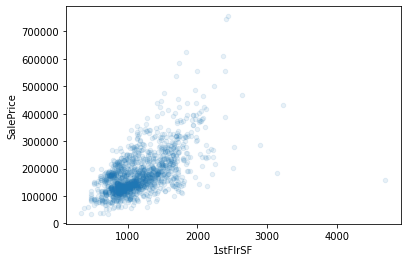

In [98]:
all_data.plot(kind="scatter", x="1stFlrSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

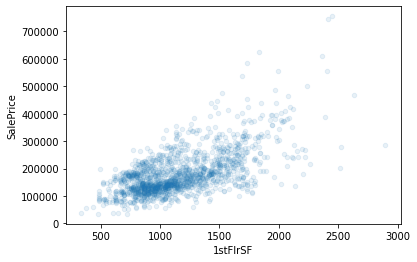

In [104]:
all_data.query("@all_data['1stFlrSF'] < 3000").plot(kind="scatter", x="1stFlrSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

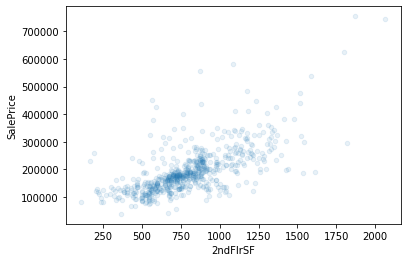

In [110]:
all_data.query("@all_data['2ndFlrSF'] != 0").plot(kind="scatter", x="2ndFlrSF", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

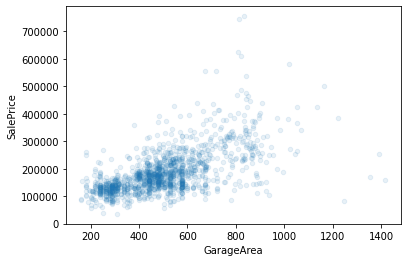

In [111]:
all_data.query("GarageArea != 0").plot(kind="scatter", x="GarageArea", y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

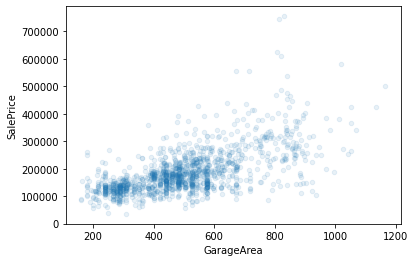

In [112]:
all_data.query("GarageArea != 0 & GarageArea < 1200").plot(kind="scatter", x="GarageArea", y="SalePrice", alpha=0.1)

In [3]:
house_price_test = pd.read_csv('./test.csv')

In [19]:
data_with_na_test = pd.DataFrame(house_price_test.isnull().sum(), columns=["sum"]).query("sum != 0")
data_with_na_test

sum
MSZoning         4
LotFrontage    227
Alley         1352
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
FireplaceQu    730
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
PoolQC        1456
Fence         1169
MiscFeature   1408
SaleType         1

In [18]:
pass_cols = [
  "OverallQual",
  "FullBath",
  "Fireplaces",
  "GarageCars",
]

for col in pass_cols:
  print(col, col in data_with_na.index)

OverallQual False
FullBath False
Fireplaces False
GarageCars True


In [22]:
data_with_na = pd.DataFrame(all_data.isnull().sum(), columns=["sum"]).query("sum != 0")
data_with_na

sum
LotFrontage    259
Alley         1369
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
FireplaceQu    690
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
PoolQC        1453
Fence         1179
MiscFeature   1406